In [122]:
import time
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np


# Formato para matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 120
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0


In [159]:
#función PID

def control(i, kp, ki, kd, err):
    #proporcional
    P = kp*err

    #integrador
    I = ki*np.trapz(error[0:i+1], t[0:i+1])

    #derivador
    if i == 0:
        D = 0
    else:
        D = kd*(error[i] - error[i-1])/(t[i]- t[i-1])

    return  P + I + D

    

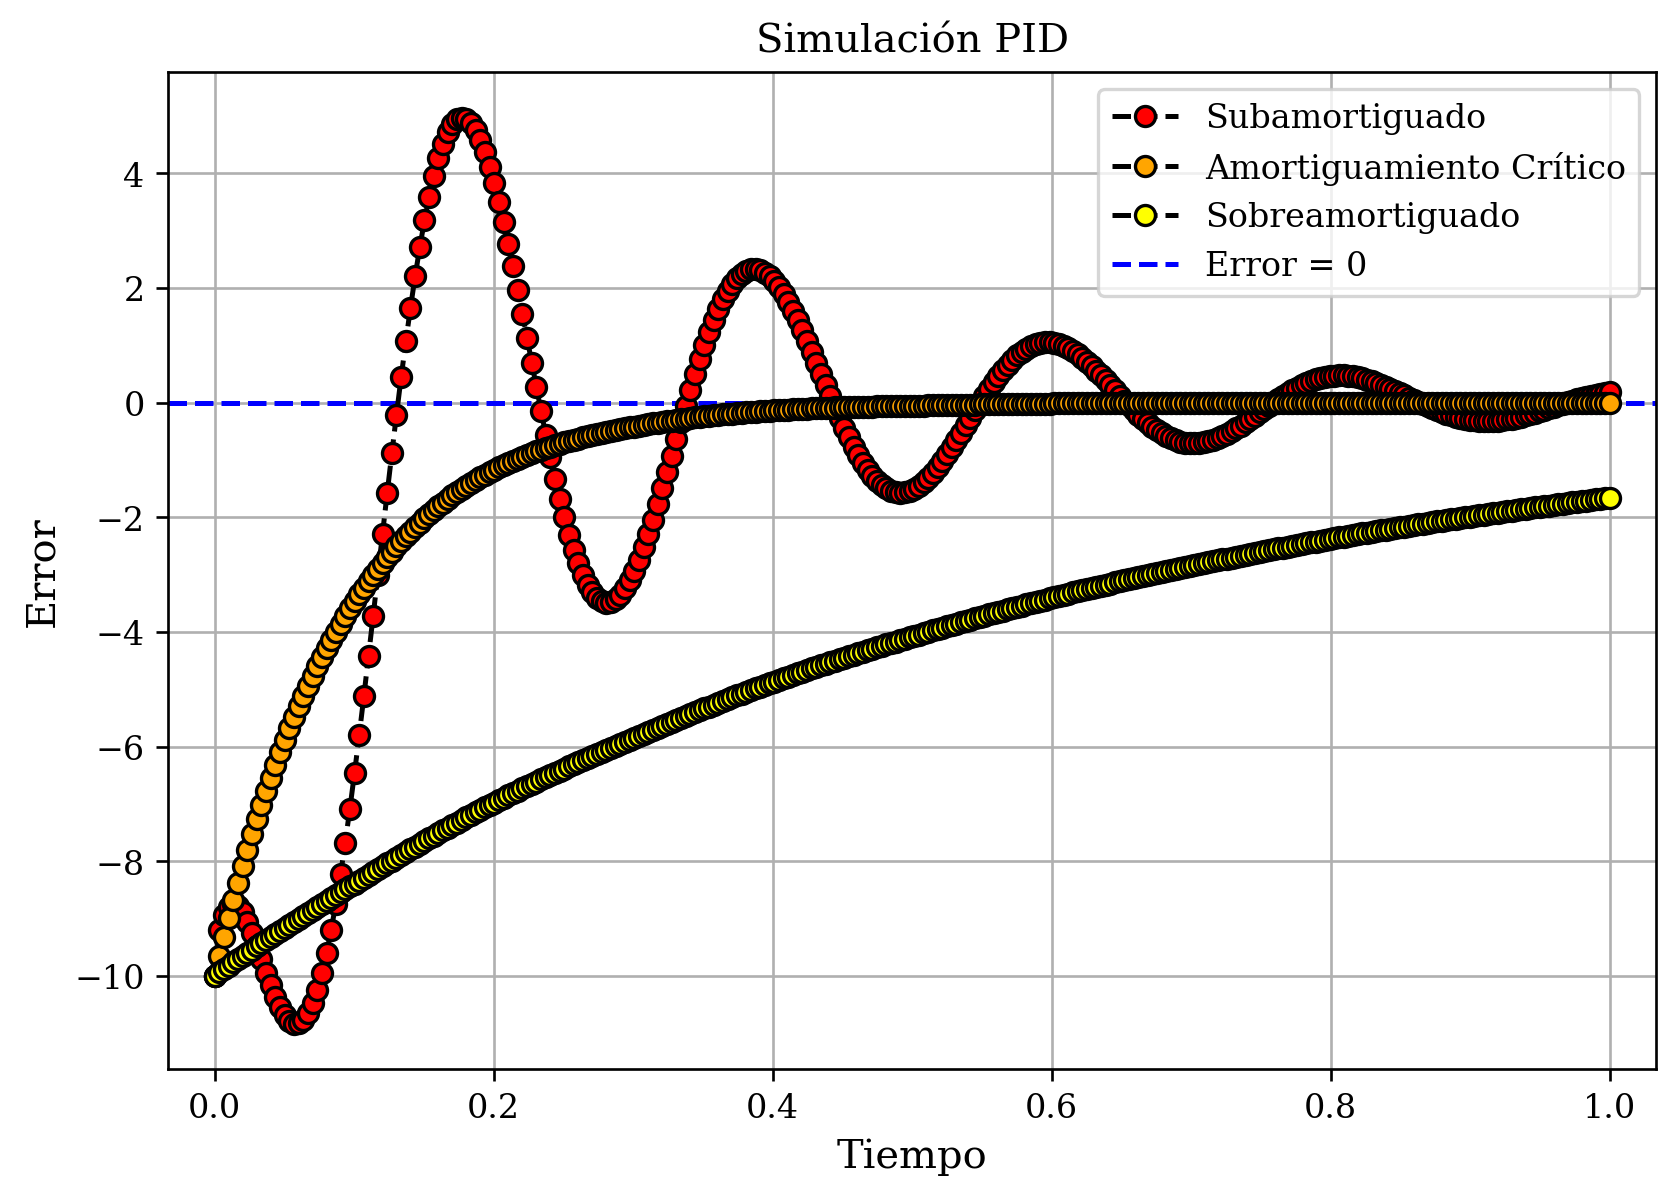

In [189]:
input = 0
set_point = 10
error1 = [set_point - input]
error2 = [set_point - input]
error3 = [set_point - input]

t = np.linspace(0, 1, 300)


kp = [0.08, 0.035, 0.006]
ki = [2 , 0.0001, 0.001]
kd = [0.006, 0.00001, 0.00001]

for i in range(len(t)):
    err = error1[i]
    err = err - control(i, kp[0], ki[0], kd[0], err)
    error1.append(err)    

for i in range(len(t)):
    err = error2[i]
    err = err - control(i, kp[1], ki[1], kd[1], err)
    error2.append(err)     

for i in range(len(t)):
    err = error3[i]
    err = err - control(i, kp[2], ki[2], kd[2], err)
    error3.append(err)   

plt.figure(figsize=(8, 5.5))
plt.plot(t, -np.array(error1[0:len(t)]), 'o--k', mfc='red', mec='black', mew=1, label='Subamortiguado')
plt.plot(t, -np.array(error2[0:len(t)]), 'o--k', mfc='orange', mec='black', mew=1, label='Amortiguamiento Crítico')
plt.plot(t, -np.array(error3[0:len(t)]), 'o--k', mfc='yellow', mec='black', mew=1, label='Sobreamortiguado')
plt.hlines(y = 0, xmin=t[0] - t[-1]*10/len(t) , xmax= t[-1] + t[-1]*10/len(t), ls = 'dashed', colors = 'blue', label = 'Error = 0')
plt.title('Simulación PID')
plt.grid()
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.show()